In [30]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Exercise 1

### Determine PCA of a 3x2 matrix 

#### define a matrix

In [31]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


#### First do it manually!

In [32]:
X = A[:,0]
Y = A[:,1]
print(X, Y)

[1 3 5] [2 4 6]


#### 1. Subtract the mean of each variable

In [33]:
mean_sub_X = X - np.mean(X)
mean_sub_Y = Y - np.mean(Y)

mean_matrix = A - np.mean(A, axis=0)
print(mean_sub_X, mean_sub_Y)
print(mean_matrix)

[-2.  0.  2.] [-2.  0.  2.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


#### 2. Calculate the Covariance Matrix

In [34]:
var_X = np.sum(mean_sub_X**2)/(len(X)-1)
var_Y = np.sum(mean_sub_Y**2)/(len(Y)-1)
cov_XY = np.sum(mean_sub_X * mean_sub_Y)/(len(X)-1)

cov_matrix = np.array([
    [var_X, cov_XY],
    [cov_XY, var_Y]
])
print(cov_matrix)

[[4. 4.]
 [4. 4.]]


#### 3. Compute the Eigenvalues and Eigenvectors

In [35]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print(eig_values)
print(eig_vectors)

[8. 0.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


#### 4. project data of the original matrix to the new basis

In [36]:
prin_eig_vector = eig_vectors[:,0].reshape(-1,1)
projected_A = np.matmul(mean_matrix, prin_eig_vector)

print(projected_A)

[[-2.82842712]
 [ 0.        ]
 [ 2.82842712]]


In [37]:
projected_matrix = np.matmul(mean_matrix, eig_vectors)

print(projected_matrix)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


#### conclusion?

The Eigen values are 8 and 0 for two columns respectively, since the second eigen value is 0, there is no extra information in the second column aftert transformation, and hence can be dropped after performing the PCA transformation. And can consider only the first column.

# Exercise 2

### Ok Let's do it again but for a larger matrix 20x5

#### Generate a dummy dataset.

In [38]:
X = np.random.randint(10,50,100).reshape(20,5)
print(X)

[[42 21 35 14 10]
 [20 41 26 46 31]
 [36 37 19 24 20]
 [37 14 14 17 12]
 [42 14 38 17 29]
 [46 35 27 42 35]
 [19 34 32 12 49]
 [37 19 30 22 39]
 [14 46 34 40 43]
 [13 10 44 25 33]
 [30 48 27 24 36]
 [12 39 45 49 24]
 [11 36 34 10 14]
 [14 36 15 38 44]
 [40 29 13 15 42]
 [44 39 17 21 26]
 [17 20 26 14 48]
 [38 34 48 10 40]
 [39 37 42 48 14]
 [42 27 28 18 44]]


#### 1. Subtract the mean of each variable

Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. Doing this proves to be very helpful when calculating the covariance matrix.

In [39]:
central_X = X - np.mean(X, axis = 0)

#### 2. Calculate the Covariance Matrix

Calculate the Covariance Matrix of the mean-centered data. 

In [40]:
cov_mat = np.cov(central_X, rowvar= False)
print(cov_mat)

[[165.08157895 -26.23157895 -28.11052632 -37.31052632 -33.65526316]
 [-26.23157895 121.11578947  -7.32631579  66.95789474  13.08421053]
 [-28.11052632  -7.32631579 111.90526316  16.56842105 -12.26842105]
 [-37.31052632  66.95789474  16.56842105 178.53684211 -12.99473684]
 [-33.65526316  13.08421053 -12.26842105 -12.99473684 156.66052632]]


Note: the matrix is symmetrical

#### 3. Compute the Eigenvalues and Eigenvectors

Now, compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix. 

In [41]:
eig_values, eig_vectors = np.linalg.eig(cov_mat)
# The above Eigen Vectors is column wise for each eigen value
# Converting it to Row wise
eig_vectors = eig_vectors.T
print(eig_values)
print(eig_vectors)

[253.01066884 181.35485507 141.1469473   88.82152611  68.96600268]
[[-0.52753037  0.45832807  0.15014975  0.68623713  0.13483595]
 [ 0.43675002  0.09465772  0.05213214  0.41635417 -0.79007644]
 [-0.49880679 -0.41149083  0.64073475 -0.17512103 -0.37504492]
 [-0.52633992  0.11431773 -0.66767148 -0.24624489 -0.45108313]
 [-0.0715486  -0.77368084 -0.34410909  0.51422163  0.11603365]]


Note: The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.
A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

#### 4. Sort Eigenvalues in descending order

Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

In [42]:
desc_order = np.argsort(eig_values)[::-1]
eig_values = eig_values[desc_order]
eig_vectors = eig_vectors[desc_order]

print(eig_values)
print(eig_vectors)

[253.01066884 181.35485507 141.1469473   88.82152611  68.96600268]
[[-0.52753037  0.45832807  0.15014975  0.68623713  0.13483595]
 [ 0.43675002  0.09465772  0.05213214  0.41635417 -0.79007644]
 [-0.49880679 -0.41149083  0.64073475 -0.17512103 -0.37504492]
 [-0.52633992  0.11431773 -0.66767148 -0.24624489 -0.45108313]
 [-0.0715486  -0.77368084 -0.34410909  0.51422163  0.11603365]]


Note: Each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.
Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

#### 5. Select a subset from the rearranged Eigenvalue matrix

Select a subset of n first eigenvectors from the rearranged Eigenvector matrix as per our need, n is desired dimension of your final reduced data. i.e. "n_components=2" means you selected the first two principal components.

In [43]:
n_components = 2

desired_eig_vectors = eig_vectors[:2]
print(desired_eig_vectors)

[[-0.52753037  0.45832807  0.15014975  0.68623713  0.13483595]
 [ 0.43675002  0.09465772  0.05213214  0.41635417 -0.79007644]]


Note: The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 ).

#### 6. Transform the data

Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

In [44]:
projected_matrix = np.matmul(central_X, desired_eig_vectors.T)

print(projected_matrix)

[[-2.08844995e+01  1.71428703e+01]
 [ 2.33275256e+01  5.69006310e+00]
 [-4.57773329e+00  1.14655567e+01]
 [-2.22799056e+01  1.28706507e+01]
 [-1.90217522e+01  2.87427279e+00]
 [ 4.80631252e+00  1.17040271e+01]
 [ 6.42642644e-01 -2.34739157e+01]
 [-1.05141129e+01 -5.07223941e+00]
 [ 2.74861549e+01 -8.01913353e+00]
 [ 1.37345567e+00 -9.68678831e+00]
 [ 6.98763100e+00 -2.33787436e+00]
 [ 3.05988175e+01  9.77685579e+00]
 [-1.18913037e-02  1.45630833e-01]
 [ 1.88123905e+01 -1.15790063e+01]
 [-1.44651211e+01 -8.98636706e+00]
 [-9.43131532e+00  9.05508688e+00]
 [-4.38214982e+00 -2.43626320e+01]
 [-9.56403624e+00 -8.06357138e+00]
 [ 1.29537954e+01  2.87078047e+01]
 [-1.18562084e+01 -7.85129066e+00]]


# Exercise 3

### Now, let’s just combine everything above by making a function and try our Principal Component analysis from scratch on an example.

#### Create a PCA function accepting data matrix and the number of components as input arguments.

In [53]:
def PCA(data, num_components):
    # Finding the Centralised Matrix (Matrix - Column Mean)
    central_X = data - np.mean(data, axis = 0)

    # Finding the Co-Variance Matrix
    cov_mat = np.cov(central_X, rowvar= False)

    # Finding the Eigen Values and Eigen Vectors
    eig_values, eig_vectors = np.linalg.eig(cov_mat)
    # Eigen vectors are column wise, making them row wise
    eig_vectors = eig_vectors.T

    # Taking the Descinding order of Eigen Values
    # and their corresponding Eigen Vectors
    desc_order = np.argsort(eig_values)[::-1]
    eig_values = eig_values[desc_order]
    eig_vectors = eig_vectors[desc_order]

    # Desired Eigen Vectors
    desired_eig_vectors = eig_vectors[:num_components]

    projected_matrix = np.matmul(central_X, desired_eig_vectors.T)

    return projected_matrix, eig_values

#### Let's use the IRIS dataset to test our PCA function, and by the same way see if we can classify the dataset in the projected space

In [54]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 1. prepare the dataset & target set for classification

In [55]:
target = data.iloc[:,-1]
data = data.iloc[:,:-1]
print(data.head())
print(target.head())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: target, dtype: object


#### 2. Apply the PCA function

In [56]:
reduced_data_2, eig_val_2 = PCA(data.to_numpy(), 2)
reduced_data_1, eig_val_2 = PCA(data.to_numpy(), 1)

#### 3. Create a Pandas Dataframe of reduced Dataset with target data

In [57]:
reduced_df1 = np.c_[reduced_data_1, target]
reduced_df1 = pd.DataFrame(reduced_df1)
reduced_df1

,0,1
0,-2.684207,Iris-setosa
1,-2.715391,Iris-setosa
2,-2.88982,Iris-setosa
3,-2.746437,Iris-setosa
4,-2.728593,Iris-setosa
...,...,...
145,1.944017,Iris-virginica
146,1.525664,Iris-virginica
147,1.764046,Iris-virginica
148,1.901629,Iris-virginica


In [58]:
reduced_df = np.c_[reduced_data_2, target]
reduced_df = pd.DataFrame(reduced_df)
reduced_df

,0,1,2
0,-2.684207,-0.326607,Iris-setosa
1,-2.715391,0.169557,Iris-setosa
2,-2.88982,0.137346,Iris-setosa
3,-2.746437,0.311124,Iris-setosa
4,-2.728593,-0.333925,Iris-setosa
...,...,...,...
145,1.944017,-0.187415,Iris-virginica
146,1.525664,0.375021,Iris-virginica
147,1.764046,-0.078519,Iris-virginica
148,1.901629,-0.115877,Iris-virginica


#### 4. Vizualize the data with one and two principal components

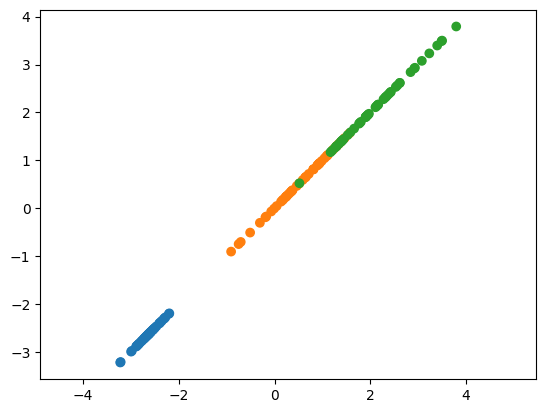

In [59]:
colors = {cat:color for cat,color in zip(target.unique(), ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink'])}
plt.scatter(reduced_df1[0], reduced_df1[0], c=reduced_df1[1].map(colors))
plt.axis('equal')
# plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

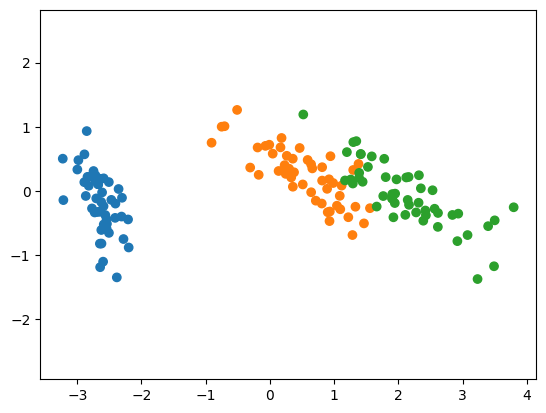

In [60]:
colors = {cat:color for cat,color in zip(target.unique(), ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink'])}
plt.scatter(reduced_df[0], reduced_df[1], c=reduced_df[2].map(colors))
plt.axis('equal')
# plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 5. Conclusion

In [64]:
print(np.cumsum(eig_val_2/eig_val_2.sum()))

[0.92461621 0.97763178 0.99481691 1.        ]


As we can see, the first column after transformation will have 92.46% of the original data, and if we take the first two component of the eigen vectors set, and use those to generate the data, we can get 97.76% of the original data.

# More?

### Go to: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html